# Visualize latent representation of the trained models

## Dataset definition

In [1]:
import torch
import matplotlib.pyplot as plt
from dataset import MNISTDataset, MNISTFlowDataset

latent_train_set = MNISTFlowDataset(path='data/MNIST/latent')
image_train_set = MNISTDataset(path='data/MNIST/processed', normalize=True)

latent_test_set = MNISTFlowDataset(path='data/MNIST/latent', train=False)
image_test_set = MNISTDataset(path='data/MNIST/processed', train=False, normalize=True)

def show_z(samples, labels, fname=None, title='latent space'):
    plt.figure()
    plt.title(title)
    plt.scatter(samples[:, 0], samples[:, 1], s=1, c=labels)
    plt.xlabel('z1')
    plt.ylabel('z2')
    if fname:
        # TODO: save the figure in file
        pass

Matplotlib is building the font cache; this may take a moment.
/scratch/sagar/Projects/flow/ae_flow/dataset.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dataset = torch.tensor(self.dataset, dtype=torch.float32)


## Autoencoder

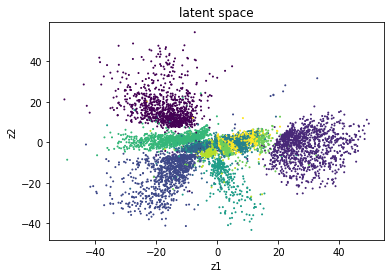

In [20]:
show_z(latent_test_set.dataset, latent_test_set.labels)

## Flow AE

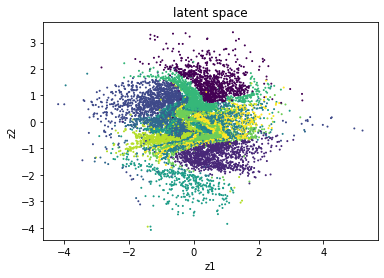

In [2]:
# import flow model
flow_model = torch.load('trained_models/mnist_flow_3.model')

# flow_model = torch.load('trained_models/mnist_flow_semisupervised_1.model')

flow_model = flow_model.to('cuda')
flow_model.eval()

cuda_latent_train = latent_train_set.dataset.to('cuda')
y_flow, log_det = flow_model.forward(cuda_latent_train[0:10000])

y_flow.to('cpu')

show_z(y_flow.detach().cpu(), latent_train_set.labels[0:10000])

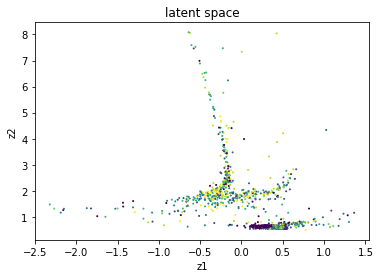

In [3]:
# import flow model
ae_model, flow_model = torch.load('trained_models/mnist_flow_ae_joint_2.model')

# flow_model = torch.load('trained_models/mnist_flow_semisupervised_1.model')

flow_model = flow_model.to('cuda')
flow_model.eval()
ae_model.eval()

cuda_train = image_train_set.dataset.to('cuda').unsqueeze(dim=1)
# cuda_latent = cuda_latent_train.dataset.to('cuda')

z = ae_model.encoder(cuda_train[0:10000])
y, log_det = flow_model.forward(z)

y.to('cpu')

show_z(y.detach().cpu(), image_train_set.labels[0:10000])

## VAE

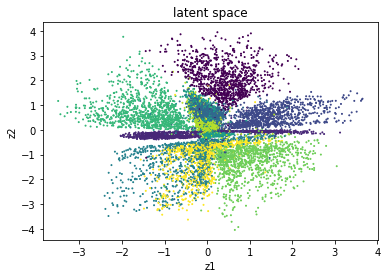

In [5]:
vae_model = torch.load('trained_models/vae_mnist_zdim_2.model')
vae_model = vae_model.to('cpu')
vae_model.eval()

z_vae, _ = vae_model.encode(image_train_set.dataset[0:10000].unsqueeze(dim=1))

show_z(z_vae.detach(), image_train_set.labels[0:10000])

## AAE

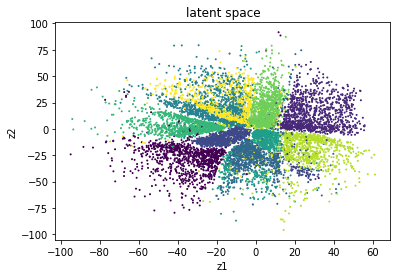

In [6]:
aae_model = torch.load('trained_models/mnist_aae_1.model')
# aae_model = torch.load('trained_models/mnist_aae_semisupervised_r_100_2.model')

aae_model = aae_model.to('cpu')
aae_model.eval()

z_aae = aae_model.autoencoder.encoder(image_train_set.dataset[0:10000].unsqueeze(dim=1))

show_z(z_aae.detach(), image_train_set.labels[0:10000])

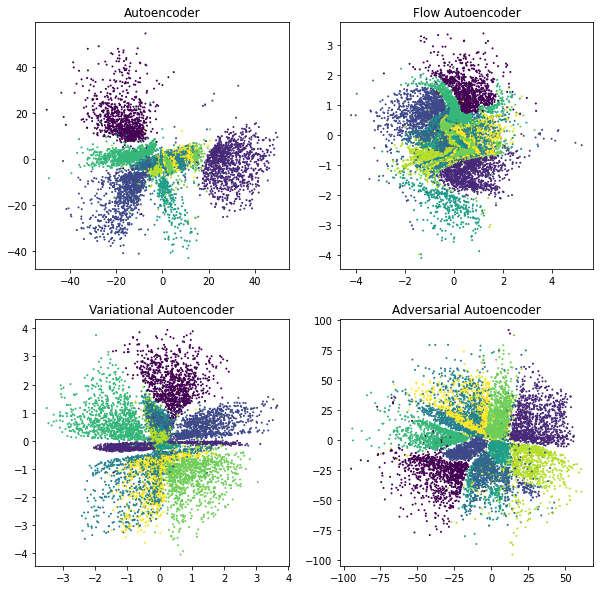

In [34]:
fig, axes = plt.subplots(2,2, figsize=(10,10))


def show_z(samples, labels, fname=None, title='latent space'):
    plt.figure()
    plt.title(title)
    plt.scatter(samples[:, 0], samples[:, 1], s=1, c=labels)
    plt.xlabel('z1')
    plt.ylabel('z2')
    if fname:
        # TODO: save the figure in file
        pass

axes[0,0].scatter(latent_test_set.dataset[:,0],latent_test_set.dataset[:,1], s=1, c=latent_test_set.labels[:10000])
axes[0,0].set_title('Autoencoder')
# axes[0,0].set_xlabel('z1')
# axes[0,0].set_ylabel('z2')

y_flow = y_flow.detach().cpu()
axes[0,1].scatter(y_flow[:,0], y_flow[:,1], s=1, c=image_train_set.labels[:10000])
axes[0,1].set_title('Flow Autoencoder')

z_vae = z_vae.detach().cpu()
axes[1,0].scatter(z_vae[:,0], z_vae[:,1], s=1, c=image_train_set.labels[:10000])
axes[1,0].set_title('Variational Autoencoder')


z_aae = z_aae.detach().cpu()
axes[1,1].scatter(z_aae[:,0], z_aae[:,1], s=1, c=image_train_set.labels[:10000])
axes[1,1].set_title('Adversarial Autoencoder')

fig.savefig('data/latent.pdf')

In [35]:
fig.savefig('data/latent.png')

In [12]:
axes[0].imshow(2,2)

AttributeError: 'numpy.ndarray' object has no attribute 'imshow'

In [ ]:
a

## Save latent dataset

In [13]:
ae = torch.load('trained_models/mnist_ae_zdim_2.model')

ae.eval()
ae = ae.to('cpu')

ae_set = MNISTDataset(path='data/MNIST/processed',train=False, normalize=True)

latent = ae.encoder(ae_set.dataset.unsqueeze(dim=1))
lat = latent.detach().clone()

torch.save((lat, ae_set.labels), 'data/MNIST/latent/test.pt')

/scratch/sagar/Projects/flow/ae_flow/dataset.py:19: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.dataset = torch.tensor(self.dataset, dtype=torch.float32)


AttributeError: 'Flow' object has no attribute 'encoder'